In [1]:
import json
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

In [3]:
ctrl_color = 'black'
dspn_color = 'deepskyblue'

In [4]:
models_pd = json.load(open('val_models-pd2.json'))
models = json.load(open('val_models.json'))
models = [x for x in models if 'var0.swc' in x['morph']]

In [5]:
rheo = np.array([x['features']['fi_rheobase'] for x in models])
rheo_pd = np.array([x['features']['fi_rheobase'] for x in models_pd])

In [6]:
rin = np.array([(x['features']['ir_fitrest']+x['features']['ir_fitmax'])/2 for x in models])
rin_pd = np.array([(x['features']['ir_fitrest']+x['features']['ir_fitmax'])/2 for x in models_pd])

In [7]:
thresh = np.array([x['features']['ap_avg_thresh'] for x in models])
thresh_pd = np.array([x['features']['ap_avg_thresh'] for x in models_pd])

In [8]:
ahp = np.array([x['features']['ahp_depth'] for x in models])
ahp_pd = np.array([x['features']['ahp_depth'] for x in models_pd])
ahp_abs = np.array([x['features']['ahp_depth_abs'] for x in models])
ahp_abs_pd = np.array([x['features']['ahp_depth_abs'] for x in models_pd])

In [9]:
ap_amp = np.array([(x['features']['ap_peak']-x['features']['ahp_depth_abs']) for x in models])
ap_amp_pd = np.array([(x['features']['ap_peak']-x['features']['ahp_depth_abs']) for x in models_pd])

In [10]:
from scipy.optimize import curve_fit

def fitvolt(x, a, b, c, d):
    return a + b*x + np.exp((x-c)/d)

def fitfreq(x, a, b, c):
    return a / (1 + np.exp(-(x - b) / c))

In [11]:
ivcurve = dict()
for model in models:
    for x, y in zip(model['iv_curve']['stim'], model['iv_curve']['volt']):
        ix = int(x)
        if ix not in ivcurve:
            ivcurve[ix] = list()
        ivcurve[ix].append(y)

In [12]:
ivstim = np.array(list(ivcurve.keys()))
v = np.array([np.mean(ivcurve[x]) for x in ivcurve])
popt, _ = curve_fit(fitvolt, ivstim, v,
                   bounds=([-100, 0, -1000, 1], [0, 0.1, 1000, 1000]))
vmean = fitvolt(ivstim, *popt)

v = np.array([np.max(ivcurve[x]) for x in ivcurve])
popt, _ = curve_fit(fitvolt, ivstim, v,
                   bounds=([-100, 0, -1000, 1], [0, 0.1, 1000, 1000]))
vmax = fitvolt(ivstim, *popt)

v = np.array([np.min(ivcurve[x]) for x in ivcurve])
popt, _ = curve_fit(fitvolt, ivstim, v,
                   bounds=([-100, 0, -1000, 1], [0, 0.1, 1000, 1000]))
vmin = fitvolt(ivstim, *popt)

In [13]:
ivcurve_pd = dict()
for model in models_pd:
    for x, y in zip(model['iv_curve']['stim'], model['iv_curve']['volt']):
        ix = int(x)
        if ix not in ivcurve_pd:
            ivcurve_pd[ix] = list()
        ivcurve_pd[ix].append(y)

In [14]:
ivstim_pd = np.array(list(ivcurve_pd.keys()))
v = np.array([np.mean(ivcurve_pd[x]) for x in ivcurve_pd])
popt, _ = curve_fit(fitvolt, ivstim_pd, v,
                   bounds=([-100, 0, -1000, 1], [0, 0.1, 1000, 1000]))
print(popt)
popt[2] += 40.0
popt[3] *= 0.85
vmean_pd = fitvolt(ivstim_pd, *popt)
print(popt)
#vmean_pd = fitvolt(ivstim_pd, *popt)

v = np.array([np.max(ivcurve_pd[x]) for x in ivcurve_pd])
popt, _ = curve_fit(fitvolt, ivstim_pd, v,
                   bounds=([-100, 0, -1000, 1], [0, 0.1, 1000, 1000]))
#print(popt)
popt[2] += 150.0
popt[3] *= 0.7
vmax_pd = fitvolt(ivstim_pd, *popt)
#print(popt)
#vmax_pd = np.array([np.max(ivcurve_pd[x]) for x in ivcurve_pd])

v = np.array([np.min(ivcurve_pd[x]) for x in ivcurve_pd])
popt, _ = curve_fit(fitvolt, ivstim_pd, v,
                   bounds=([-100, 0, -1000, 1], [0, 0.1, 1000, 1000]))
vmin_pd = fitvolt(ivstim_pd, *popt)
#vmin_pd = np.array([np.min(ivcurve_pd[x]) for x in ivcurve_pd])

[-9.28171232e+01  2.30553905e-02  2.08608561e+02  1.02709537e+02]
[-9.28171232e+01  2.30553905e-02  2.48608561e+02  8.73031067e+01]


In [15]:
idcurve = dict()
for model in models:
    for x, y in zip(model['id_curve']['stim'], model['id_curve']['freq']):
        ix = int(x)
        if ix not in idcurve:
            idcurve[ix] = list()
        idcurve[ix].append(y)

In [16]:
idstim = np.array(list(idcurve.keys()))
idstim0 = np.linspace(0, idstim.max(), 100)
f = np.array([np.mean(idcurve[x]) for x in idcurve])
popt, _ = curve_fit(fitfreq, idstim, f,
                   bounds=([10, 100, 1], [100, 1000, 100]))
fmean = fitfreq(idstim0, *popt)

f = np.array([np.max(idcurve[x]) for x in idcurve])
popt, _ = curve_fit(fitfreq, idstim, f,
                   bounds=([10, 100, 1], [100, 1000, 100]))
fmax = fitfreq(idstim0, *popt)

f = np.array([np.min(idcurve[x]) for x in idcurve])
popt, _ = curve_fit(fitfreq, idstim, f,
                   bounds=([10, 100, 1], [100, 1000, 100]))
fmin = fitfreq(idstim0, *popt)

In [17]:
idcurve_pd = dict()
for model in models_pd:
    for x, y in zip(model['id_curve']['stim'], model['id_curve']['freq']):
        ix = int(x)
        if ix not in idcurve_pd:
            idcurve_pd[ix] = list()
        idcurve_pd[ix].append(y)

In [18]:
idstim_pd = np.array(list(idcurve_pd.keys()))
idstim0_pd = np.linspace(0, idstim_pd.max(), 100)
f = np.array([np.mean(idcurve_pd[x]) for x in idcurve_pd])
popt, _ = curve_fit(fitfreq, idstim_pd, f,
                   bounds=([10, 100, 1], [100, 1000, 100]))
fmean_pd = fitfreq(idstim0_pd, *popt)

f = np.array([np.max(idcurve_pd[x]) for x in idcurve_pd])
popt, _ = curve_fit(fitfreq, idstim_pd, f,
                   bounds=([10, 100, 1], [100, 1000, 100]))
fmax_pd = fitfreq(idstim0_pd, *popt)

f = np.array([np.min(idcurve_pd[x]) for x in idcurve_pd])
popt, _ = curve_fit(fitfreq, idstim_pd, f,
                   bounds=([10, 100, 1], [100, 1000, 100]))
fmin_pd = fitfreq(idstim0_pd, *popt)

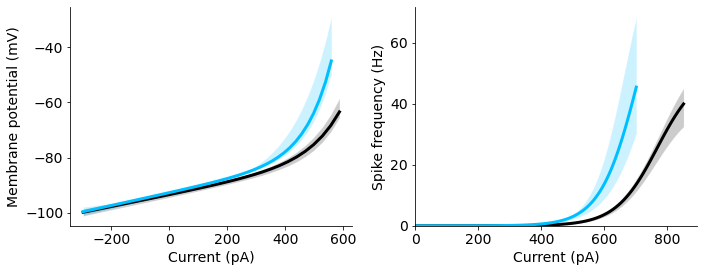

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.set_ylabel('Membrane potential (mV)')
ax1.set_xlabel('Current (pA)')
ax2.set_ylabel('Spike frequency (Hz)')
ax2.set_xlabel('Current (pA)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

#ax1.fill_between(ivstim, vmin, vmax, color=ctrl_color, edgecolor='white', alpha=0.2)
ax1.fill_between(ivstim, vmin[:len(vmax)], vmax, color=ctrl_color, edgecolor='white', alpha=0.2)
ax1.plot(ivstim, vmean, color=ctrl_color, lw=3)
ax1.fill_between(ivstim_pd, vmin_pd, vmax_pd, color=dspn_color, edgecolor='white', alpha=0.2)
ax1.plot(ivstim_pd, vmean_pd, color=dspn_color, lw=3)


ax2.fill_between(idstim0, fmin, fmax, color=ctrl_color, edgecolor='white', alpha=0.2)
ax2.plot(idstim0, fmean, color=ctrl_color, lw=3)
ax2.fill_between(idstim0_pd, fmin_pd, fmax_pd, color=dspn_color, edgecolor='white', alpha=0.2)
ax2.plot(idstim0_pd, fmean_pd, color=dspn_color, lw=3)
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

if False:
    for m, model in enumerate(models):
        ax1.plot(model['iv_curve']['stim'], model['iv_curve']['volt'], color=ctrl_color, lw=1, alpha=.5)
        ax2.plot(model['id_curve']['stim'], model['id_curve']['freq'], color=ctrl_color, lw=1, alpha=.5)
    for m, model in enumerate(models_pd):
        ax1.plot(model['iv_curve']['stim'], model['iv_curve']['volt'], color=dspn_color, lw=1, alpha=.5)
        ax2.plot(model['id_curve']['stim'], model['id_curve']['freq'], color=dspn_color, lw=1, alpha=.5)

plt.tight_layout()

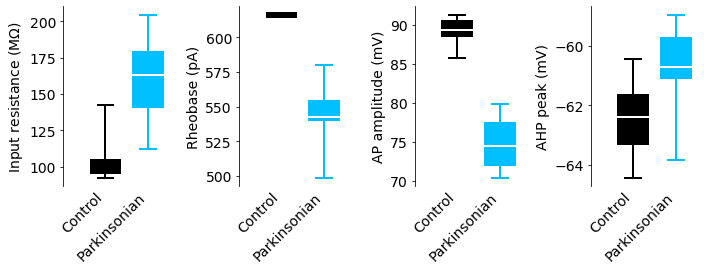

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4))

ax1.set_ylabel('Input resistance (M$\Omega$)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.boxplot([rin], positions=[2], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 0.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': ctrl_color, 'edgecolor': ctrl_color, 'linewidth': 0.0},
            whiskerprops={'color': ctrl_color, 'linewidth': 2},
            capprops={'color': ctrl_color, 'linewidth': 2})
ax1.boxplot([rin_pd], positions=[4], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 2.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': dspn_color, 'edgecolor': dspn_color, 'linewidth': 0.0},
            whiskerprops={'color': dspn_color, 'linewidth': 2},
            capprops={'color': dspn_color, 'linewidth': 2})
ax1.set_xticks([2, 4])
ax1.tick_params(axis='x', length=0)
ax1.set_xticklabels(['Control', 'Parkinsonian'], 
                    rotation=45, horizontalalignment='right')
ax1.set_xlim([0, 5])

ax2.set_ylabel('Rheobase (pA)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.boxplot([rheo], positions=[2], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 0.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': ctrl_color, 'edgecolor': ctrl_color, 'linewidth': 6.0},
            whiskerprops={'color': ctrl_color, 'linewidth': 2},
            capprops={'color': ctrl_color, 'linewidth': 2})
ax2.boxplot([rheo_pd], positions=[4], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 2.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': dspn_color, 'edgecolor': dspn_color, 'linewidth': 0.0},
            whiskerprops={'color': dspn_color, 'linewidth': 2},
            capprops={'color': dspn_color, 'linewidth': 2})

ax2.set_xticks([2, 4])
ax2.tick_params(axis='x', length=0)
ax2.set_xticklabels(['Control', 'Parkinsonian'], 
                    rotation=45, horizontalalignment='right')
ax2.set_xlim([0, 5])

#ax3.set_ylabel('Threshold (mV)')
ax3.set_ylabel('AP amplitude (mV)')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
#ax3.boxplot([thresh], positions=[2], widths=1.5, patch_artist=True,
ax3.boxplot([ap_amp], positions=[2], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 2.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': ctrl_color, 'edgecolor': ctrl_color, 'linewidth': 0.0},
            whiskerprops={'color': ctrl_color, 'linewidth': 2},
            capprops={'color': ctrl_color, 'linewidth': 2})
#ax3.boxplot([thresh_pd], positions=[4], widths=1.5, patch_artist=True,
ax3.boxplot([ap_amp_pd], positions=[4], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 2.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': dspn_color, 'edgecolor': dspn_color, 'linewidth': 0.0},
            whiskerprops={'color': dspn_color, 'linewidth': 2},
            capprops={'color': dspn_color, 'linewidth': 2})

ax3.set_xticks([2, 4])
ax3.tick_params(axis='x', length=0)
ax3.set_xticklabels(['Control', 'Parkinsonian'], 
                    rotation=45, horizontalalignment='right')
ax3.set_xlim([0, 5])

#ax4.set_ylabel('AHP amplitude (mV)')
ax4.set_ylabel('AHP peak (mV)')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
#ax4.boxplot([ahp], positions=[2], widths=1.5, patch_artist=True,
ax4.boxplot([ahp_abs], positions=[2], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 2.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': ctrl_color, 'edgecolor': ctrl_color, 'linewidth': 0.0},
            whiskerprops={'color': ctrl_color, 'linewidth': 2},
            capprops={'color': ctrl_color, 'linewidth': 2})
#ax4.boxplot([ahp_pd], positions=[4], widths=1.5, patch_artist=True,
ax4.boxplot([ahp_abs_pd], positions=[4], widths=1.5, patch_artist=True,
            showmeans=True, showfliers=False, meanline=True, whis=(0,100),
            meanprops={'color': 'white', 'linestyle': '-', 'linewidth': 2.0},
            medianprops={'linewidth': 0.0},
            boxprops={'facecolor': dspn_color, 'edgecolor': dspn_color, 'linewidth': 0.0},
            whiskerprops={'color': dspn_color, 'linewidth': 2},
            capprops={'color': dspn_color, 'linewidth': 2})
ax4.set_xlim([0, 5])
ax4.set_xticks([2, 4])
ax4.tick_params(axis='x', length=0)
ax4.set_xticklabels(['Control', 'Parkinsonian'], 
                    rotation=45, horizontalalignment='right')

plt.tight_layout()